In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randint

In [2]:
df1 = pd.read_json('/Users/aoifesullivan/Downloads/MyData/Streaming_History_Audio_2016-2018_0.json', convert_dates=True)
df2 = pd.read_json('/Users/aoifesullivan/Downloads/MyData/Streaming_History_Audio_2018-2019_1.json', convert_dates=True)
df3 = pd.read_json('/Users/aoifesullivan/Downloads/MyData/Streaming_History_Audio_2019-2021_2.json', convert_dates=True)
df4 = pd.read_json('/Users/aoifesullivan/Downloads/MyData/Streaming_History_Audio_2021-2023_3.json', convert_dates=True)

# Ideas to explore 

1. Which country have I streamed the most in
2. Which platform has been my trusty companion for my streaming needs
3. Top artist, top 10. Top artist by country, top artist by year. 
4. Top song ever, top 10 . Top songs by country, top songs by year.
5. Line plot by monthly streams - which months had the most and least.
6. By year - which year had the most and least streams. 
7. Sankey for who I listened to in Aus, and who came with me to other countries, and who dropped off in Aus never to be heard again. Makes sense as I got Spotify first in Australia. 
8. Line graph of each year  - line per year, with month as x axis counting streams - what year and month was the most active. [plots here](https://pandas.pydata.org/docs/user_guide/visualization.html)
9. Country heat map of all the places I have listened. 
10. Taylor Swift is one of my top artists of 2023, but I barely listened to her - I was looking for one specific song so skipped through loads of her songs because I didn't know what it was called! That's actually why I downloaded this data. So it would be cool to visualise the amount of TS songs I actually listened through to the end, because it's probably only one song, but that one song many times! 
11. Podcasts vs tunes - the rise and fall in a line graph showing podcasts eating music's share. 

In [3]:
df4.head(3)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-03-08T13:22:50Z,aoifesullivan73,"Android OS 10 API 29 (Fairphone, FP3)",255746,EE,46.131.57.175,unknown,Voodoo?,L'Impératrice,Voodoo?,...,None,None,None,trackdone,trackdone,False,NaN,False,1615209513364,False
1,2021-03-08T13:26:10Z,aoifesullivan73,"Android OS 10 API 29 (Fairphone, FP3)",199276,EE,46.131.57.175,unknown,G.O.Y.D.,Lava La Rue,G.O.Y.D.,...,None,None,None,trackdone,trackdone,False,NaN,False,1615209769719,False
2,2021-03-08T13:27:44Z,aoifesullivan73,"Android OS 10 API 29 (Fairphone, FP3)",93737,EE,46.131.57.175,unknown,Mother Nature's Bitch,Okay Kaya,Watch This Liquid Pour Itself,...,None,None,None,trackdone,trackdone,False,NaN,False,1615209969302,False


# Importing and processing data

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
row_total = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0]
print(row_total)

(15844, 21)
(15859, 21)
(16039, 21)
(15080, 21)
62822


In [5]:
concatenated = pd.concat([df1, df2, df3, df4])
concatenated.shape

(62822, 21)

In [6]:
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62822 entries, 0 to 15079
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 62822 non-null  object 
 1   username                           62822 non-null  object 
 2   platform                           62822 non-null  object 
 3   ms_played                          62822 non-null  int64  
 4   conn_country                       62822 non-null  object 
 5   ip_addr_decrypted                  62822 non-null  object 
 6   user_agent_decrypted               55584 non-null  object 
 7   master_metadata_track_name         58832 non-null  object 
 8   master_metadata_album_artist_name  58832 non-null  object 
 9   master_metadata_album_album_name   58832 non-null  object 
 10  spotify_track_uri                  58832 non-null  object 
 11  episode_name                       2308 non-null   obj

<AxesSubplot:>

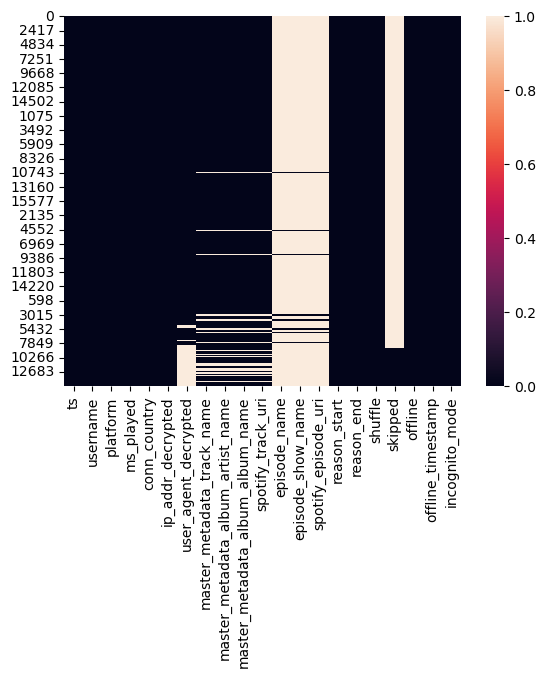

In [7]:
sns.heatmap(concatenated.isnull())

In [8]:
#making sure it's only my data as I changed to premium duo, if so I can drop the column
concatenated['username'].unique()

array(['aoifesullivan73'], dtype=object)

In [9]:
df = concatenated.drop(['username', 'user_agent_decrypted', 'offline', 'offline_timestamp', 'incognito_mode'], axis = 1)

In [10]:
df.head(5)

,ts,platform,ms_played,conn_country,ip_addr_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped
0,2016-10-18T02:38:13Z,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",197400,AU,220.244.175.56,Not a One,The Young Wild,All the Luck,spotify:track:0nspbHlLDeuyRBPF5RkTEB,None,None,None,clickrow,trackdone,True,NaN
1,2016-10-18T02:39:01Z,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",9504,AU,220.244.175.56,Wish I Knew You,The Revivalists,Men Amongst Mountains,spotify:track:2xWukbn2Ly4grvop0O9umE,None,None,None,trackdone,remote,True,NaN
2,2016-10-18T02:41:04Z,OS X 10.11.6 [x86 4],122704,AU,220.244.175.56,All I Want,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:6vwOfYltMEYVxkyb50JcEe,None,None,None,clickrow,trackdone,False,NaN
3,2016-10-18T02:43:15Z,OS X 10.11.6 [x86 4],130308,AU,220.244.175.56,Do You Wanna,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:4dBXLwLEZkJXrZsf7kBjfD,None,None,None,trackdone,trackdone,False,NaN
4,2016-10-18T02:45:28Z,OS X 10.11.6 [x86 4],133264,AU,220.244.175.56,The Sound of Drums - Vocal,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:6lMUlPqM9iv7PwqHfNsQhY,None,None,None,trackdone,trackdone,False,NaN


In [11]:
df = df.rename(columns = {'conn_country' : 'country', 'master_metadata_track_name' : 'track_name', 'master_metadata_album_artist_name' : 'artist_name', 'master_metadata_album_album_name' : 'album_name'})

In [12]:
df.head(5)

,ts,platform,ms_played,country,ip_addr_decrypted,track_name,artist_name,album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped
0,2016-10-18T02:38:13Z,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",197400,AU,220.244.175.56,Not a One,The Young Wild,All the Luck,spotify:track:0nspbHlLDeuyRBPF5RkTEB,None,None,None,clickrow,trackdone,True,NaN
1,2016-10-18T02:39:01Z,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",9504,AU,220.244.175.56,Wish I Knew You,The Revivalists,Men Amongst Mountains,spotify:track:2xWukbn2Ly4grvop0O9umE,None,None,None,trackdone,remote,True,NaN
2,2016-10-18T02:41:04Z,OS X 10.11.6 [x86 4],122704,AU,220.244.175.56,All I Want,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:6vwOfYltMEYVxkyb50JcEe,None,None,None,clickrow,trackdone,False,NaN
3,2016-10-18T02:43:15Z,OS X 10.11.6 [x86 4],130308,AU,220.244.175.56,Do You Wanna,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:4dBXLwLEZkJXrZsf7kBjfD,None,None,None,trackdone,trackdone,False,NaN
4,2016-10-18T02:45:28Z,OS X 10.11.6 [x86 4],133264,AU,220.244.175.56,The Sound of Drums - Vocal,Pierluigi Ferrantini,Rockin' Vibes: Great Rock Hits Selection,spotify:track:6lMUlPqM9iv7PwqHfNsQhY,None,None,None,trackdone,trackdone,False,NaN


Looking good, let's start answering some questions.

In [13]:
#Want a few new columns too: 
df['seconds_played'] = df['ms_played'].apply(lambda ms: ms / 1000)
df['hours_played']= df['seconds_played'].apply(lambda s: s / 3600)

In [14]:
df['ts'] = pd.to_datetime(df['ts'])
df['month'] = df['ts'].dt.month
df['year'] = df['ts'].dt.year

In [15]:
df.head(2)

,ts,platform,ms_played,country,ip_addr_decrypted,track_name,artist_name,album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,seconds_played,hours_played,month,year
0,2016-10-18 02:38:13+00:00,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",197400,AU,220.244.175.56,Not a One,The Young Wild,All the Luck,spotify:track:0nspbHlLDeuyRBPF5RkTEB,None,None,None,clickrow,trackdone,True,NaN,197.400,0.054833,10,2016
1,2016-10-18 02:39:01+00:00,"Android OS 6.0.1 API 23 (samsung, SM-G900I)",9504,AU,220.244.175.56,Wish I Knew You,The Revivalists,Men Amongst Mountains,spotify:track:2xWukbn2Ly4grvop0O9umE,None,None,None,trackdone,remote,True,NaN,9.504,0.002640,10,2016


# Which country have I streamed most in?

In [16]:
countries = df['country'].value_counts()
print(countries)

EE    25076
DE    23288
AU    10013
GB     3071
VN      565
KH      519
FI       57
HK       55
ZZ       43
NL       34
PT       26
IE       25
CY       17
MY       15
SE       10
GE        5
CU        1
LV        1
CZ        1
Name: country, dtype: int64


In [17]:
number_of_countries = df['country'].nunique()
number_of_countries

19

<AxesSubplot:xlabel='country', ylabel='count'>

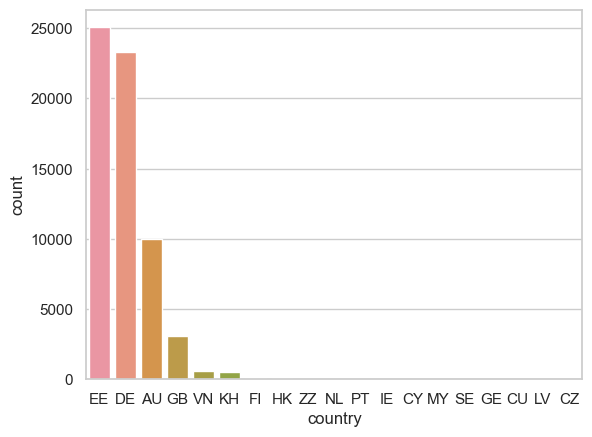

In [18]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df['country'], order = df['country'].value_counts().index)

# 2. Which platform has been my trusty streaming companion the most? 

In [19]:
df['platform'].unique()

array(['Android OS 6.0.1 API 23 (samsung, SM-G900I)',
       'OS X 10.11.6 [x86 4]', 'Windows 10 (10.0.14393; x64)',
       'Windows 10 (10.0.16299; x64)',
       'Windows 10 (10.0.16299; x64; AppX)',
       'Android OS 5.1.1 API 22 (OnePlus, ONE E1003)',
       'Android OS 7.0 API 24 (ZTE, ZTE BLADE A612)',
       'Partner spotify web_player', 'iOS 12.0.1 (iPhone7,2)',
       'iOS 12.1.2 (iPhone7,2)',
       'web_player windows 10;chrome 72.0;desktop',
       'web_player windows 10;chrome 72.0.3626.121;embed',
       'iOS 12.1.4 (iPhone7,2)', 'iOS 12.2 (iPhone7,2)',
       'web_player windows 10;chrome 74.0.3729.131;embed',
       'iOS 12.3.1 (iPhone7,2)',
       'web_player windows 10;chrome 75.0.3770.100;embed',
       'web_player windows 10;chrome 75.0.3770.142;desktop',
       'Android-tablet OS 4.4.2 API 19 (samsung, SM-T230NU)',
       'iOS 12.4.1 (iPhone7,2)', 'iOS 12.4.3 (iPhone7,2)',
       'web_player windows 10;chrome 79.0.3945.130;desktop',
       'web_player windows 10;ch

Ok yuk. That's so messy. 
Ineed to map them out a bit using regex to 
1. group the same device but a different version eg web player windows 10 embed is the same as web player windows 10 desktop
2. group one machine but sometimes using the app and sometimes using the web version (ie laptop before I could be bothered to get IT permission to download the app.)

In [20]:
platform_mapping = {
    r'^Partner google cast_tv.*': 'Chromecast',
    r'^cast.*' : 'Chromecast',
    r'^web_player windows 10.*': 'Work Laptop',
    r'^Windows 10.*': 'Work Laptop',
    r'^Partner raumfeld.*': 'Teufel Stereo',
    r'^web_player osx.*': 'Personal Mac',
    r'^OS X.*': 'Personal Mac',
    r'^iOS.*': 'iPhone',
    r'.*samsung.*': 'Samsung Phone',
    r'.*OnePlus.*': 'OnePlus Phone',
    r'.*ZTE BLADE.*': 'ZTE phone',
    r'.*Fairphone.*': 'Fairphone',
    r'Android-tablet.*': 'Android Tablet',
    'android': 'Android Other',
    'osx': 'Mac Other',
    'Partner spotify web_player': 'Web Other',
    'not_applicable': 'Unknown'
}

In [21]:
df['platform'] = df['platform'].replace(platform_mapping, regex = True)

In [22]:
df['platform'].unique()

array(['Samsung Phone', 'Personal Mac', 'Work Laptop', 'OnePlus Phone',
       'ZTE phone', 'Web Other', 'iPhone', 'Teufel Stereo', 'Fairphone',
       'Chromecast', 'Android Other', 'Mac Other', 'Unknown'],
      dtype=object)

In [23]:
#much better

In [24]:
platform_counts = df['platform'].value_counts()
min_count = 100
filtered_platforms = platform_counts[platform_counts >= min_count]
filtered_platforms

Work Laptop      21270
Samsung Phone    12844
Fairphone         8690
ZTE phone         4925
iPhone            3438
Chromecast        3006
Teufel Stereo     2832
Android Other     2399
Personal Mac      1972
Unknown           1213
Mac Other          128
OnePlus Phone      104
Name: platform, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Work Laptop'),
  Text(1, 0, 'Samsung Phone'),
  Text(2, 0, 'Fairphone'),
  Text(3, 0, 'ZTE phone'),
  Text(4, 0, 'iPhone'),
  Text(5, 0, 'Chromecast'),
  Text(6, 0, 'Teufel Stereo'),
  Text(7, 0, 'Android Other'),
  Text(8, 0, 'Personal Mac'),
  Text(9, 0, 'Unknown'),
  Text(10, 0, 'Mac Other'),
  Text(11, 0, 'OnePlus Phone')])

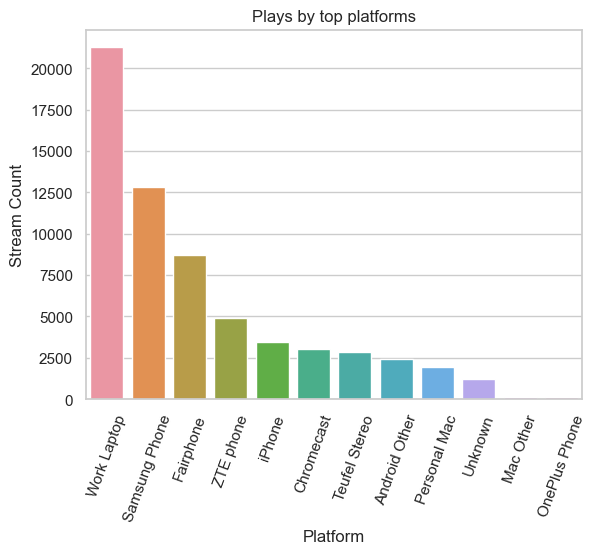

In [25]:
#sns.countplot(x=df.['platform'])
sns.set_theme(style="whitegrid")
new_graph = sns.countplot(x=df['platform'], order=filtered_platforms.index)
new_graph.set(xlabel ="Platform", ylabel = "Stream Count", title ='Plays by top platforms')
plt.xticks(rotation=70) # bit of a squiffy little angle but whatever

Conclusion: Thanks trusty work laptop! 
This was my laptop provided by work but I also used it as my person laptop for a while as I didn't have one, and would leave it open on my desk after working from home and just keep playing music from it, so not all that surprised that's the winner. 
Estonia is the winner likely because I listened to Spotify most days during work, although DE is a surprising contender considering I have only liked here a year. 

# 3. Top artist information - by country and by year

### Top 10 artists

Top 10

In [26]:
artist_counts = df['artist_name'].value_counts()
min_to_care = 100
more_than_100 = artist_counts[artist_counts >= min_count]
top_10 = more_than_100.iloc[:9]
print(top_10)

The Tallest Man On Earth    1623
John Butler Trio            1506
Nick Drake                  1371
Frank Turner                1134
Tom Waits                   1098
Vulfpeck                     944
Iron & Wine                  784
Tom Misch                    656
Isak Strand vs. TOE          537
Name: artist_name, dtype: int64


Top of all time

In [27]:
top_artist_name = artist_counts.iloc[0]
#top_song_playcount = top_songs['play_count'].iloc[0]
#leading_by = top_song_playcount['play_count'].iloc[0] - top_songs['play_count'].iloc[1]
#second_best = top_song_playcount['index'].iloc[1]
#second_best_playcount = top_songs['play_count'].iloc[1]

top_artist_name

1623

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

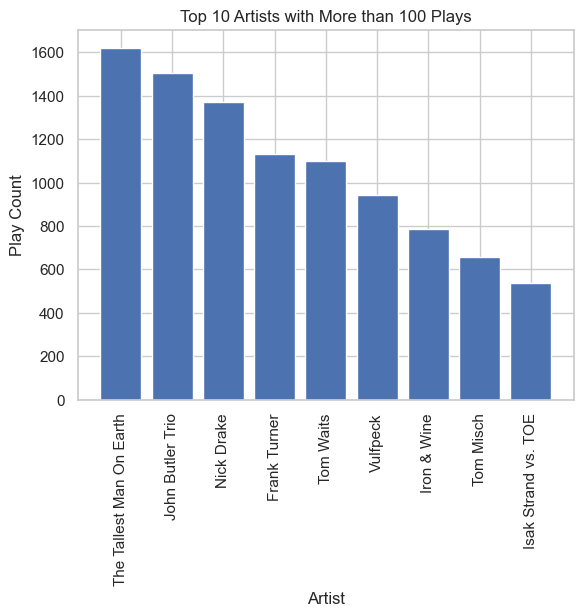

In [28]:
plt.bar(top_10.index, top_10.values)
plt.xlabel('Artist')
plt.ylabel('Play Count')
plt.title('Top 10 Artists with More than 100 Plays')
plt.xticks(rotation=90)

Conclusion: 
Dammit, why are they all men. Anyway, none of them are a surprise. I don't actually like Iron and Wine that much but they were on one of my sleep playlists so I listened to them a LOT because of that. The rest are on it because they are great, so can't argue with that. I am quite surprised at the perfect stepwise distribution though. 
Let's dig into it further and see more about my top artists and where they changed over time. 

### Top artists by country

In [29]:
countries_group = df.groupby(['country'])
top_artists_by_country = countries_group['artist_name'].value_counts()
print(top_artists_by_country)

country  artist_name             
AU       The Tallest Man On Earth    857
         Nick Drake                  798
         Tom Waits                   648
         John Butler Trio            590
         Iron & Wine                 501
                                    ... 
ZZ       MC Licia                      1
         MC5                           1
         Matthew Dear                  1
         Oh Wonder                     1
         The Whitest Boy Alive         1
Name: artist_name, Length: 9804, dtype: int64


In [30]:
#groupby level 0 is really important here, otherwise I just get top 5 total, instead of top 5 per country.
pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows') to turn off the max rown if you want
top_5_artists_by_country = top_artists_by_country.groupby(level=0).nlargest(5)
top_5_artists_by_country

country  country  artist_name                     
AU       AU       The Tallest Man On Earth            857
                  Nick Drake                          798
                  Tom Waits                           648
                  John Butler Trio                    590
                  Iron & Wine                         501
CU       CU       Allman Brothers Band                  1
CY       CY       The Tallest Man On Earth              6
                  Iron & Wine                           3
                  Tom Waits                             2
                  Elliott Smith                         1
                  John Butler Trio                      1
CZ       CZ       Reuben James                          1
DE       DE       Tom Misch                           329
                  Vulfpeck                            298
                  King Gizzard & The Lizard Wizard    270
                  John Butler Trio                    253
                  Bue

In [31]:
#I want to but have struggled with making this subplots, one for each country. 

### Top artist by year

In [32]:
df.head(2)

,ts,platform,ms_played,country,ip_addr_decrypted,track_name,artist_name,album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,seconds_played,hours_played,month,year
0,2016-10-18 02:38:13+00:00,Samsung Phone,197400,AU,220.244.175.56,Not a One,The Young Wild,All the Luck,spotify:track:0nspbHlLDeuyRBPF5RkTEB,None,None,None,clickrow,trackdone,True,NaN,197.400,0.054833,10,2016
1,2016-10-18 02:39:01+00:00,Samsung Phone,9504,AU,220.244.175.56,Wish I Knew You,The Revivalists,Men Amongst Mountains,spotify:track:2xWukbn2Ly4grvop0O9umE,None,None,None,trackdone,remote,True,NaN,9.504,0.002640,10,2016


In [33]:
df = df.drop(df[df['artist_name'] == 'F. Scott Fitzgerald'].index)

In [34]:
year_group = df.groupby(['year'])
top_artists_by_year = year_group['artist_name'].value_counts()
top_5_artists_by_year = top_artists_by_year.groupby(level=0).nlargest(5)
print(top_5_artists_by_year)

year  year  artist_name                       
2016  2016  Iron & Wine                              9
            John Butler Trio                         9
            Tom Waits                                9
            The Raconteurs                           8
            Pierluigi Ferrantini                     7
2017  2017  Nick Drake                            1136
            The Tallest Man On Earth               961
            Tom Waits                              745
            John Butler Trio                       697
            Iron & Wine                            562
2018  2018  John Butler Trio                       501
            Frank Turner                           453
            Wolfgang Amadeus Mozart                366
            Isak Strand vs. TOE                    289
            The Tallest Man On Earth               252
2019  2019  Tom Misch                              440
            CAKE                                   215
            John B

I will eventually graph this, I want subplots bar charts for the streams over time, and a line graph with each year as its own line. Month on the x axis, year as the line, and playcount total on the y axis. 

### 4. Top song of all time, top 10, top by country, top by year. 

Top 10:

In [35]:
#Top song of all time: 
top_songs = df['track_name'].value_counts().reset_index(name='play_count')
print(top_songs.head(10))

                  index  play_count
0  The Way I Tend To Be         225
1              Hard Sun         175
2           Better Than         165
3          Soul Singing         143
4             Pink Moon         141
5          The Gardener         137
6           Back Pocket         132
7           Feels Right         132
8             Ooh La La         131
9  Peggy Sang The Blues         130


In [36]:
top_song_name = top_songs['index'].iloc[0]
top_song_playcount = top_songs['play_count'].iloc[0]
leading_by = top_songs['play_count'].iloc[0] - top_songs['play_count'].iloc[1]
second_best = top_songs['index'].iloc[1]
second_best_playcount = top_songs['play_count'].iloc[1]

Top of all time

In [37]:
print(f'My top song of all time is {top_song_name} with {top_song_playcount} plays, leading by {leading_by} plays over {second_best}, with {second_best_playcount} plays')

My top song of all time is The Way I Tend To Be with 225 plays, leading by 50 plays over Hard Sun, with 175 plays


In [38]:
# so hard doing this because I want to go listen to all the songs.

In [39]:
#top artists by country
countries_group = df.groupby(['country'])
top_artists_by_country = countries_group['artist_name'].value_counts()
top_5_artists_by_country = top_artists_by_country.groupby(level=0).nlargest(5)

Top artists by country

In [40]:
top_5_artists_by_country

country  country  artist_name                     
AU       AU       The Tallest Man On Earth            823
                  Nick Drake                          798
                  Tom Waits                           640
                  John Butler Trio                    582
                  Iron & Wine                         499
CU       CU       Allman Brothers Band                  1
CY       CY       The Tallest Man On Earth              6
                  Iron & Wine                           3
                  Tom Waits                             2
                  Elliott Smith                         1
                  John Butler Trio                      1
CZ       CZ       Reuben James                          1
DE       DE       Tom Misch                           328
                  Vulfpeck                            298
                  King Gizzard & The Lizard Wizard    270
                  John Butler Trio                    253
                  Bue

Top songs by country

In [41]:
top_10_songs_by_country

NameError: name 'top_10_songs_by_country' is not defined

In [ ]:
#top songsby year
songs_by_year = pd.DataFrame(year_group['track_name'].value_counts()).rename({'track_name':'hi'})
songs_by_year.head(10)

In [ ]:
play_count_by_year_month = df.groupby(['year', 'month'])['hours_played'].sum()
play_count_by_year_month

In [ ]:
for year, data in play_count_by_year_month.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data.values, label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Play Count')
plt.legend(title='Year', loc='best')
plt.title('Total Play Count by Month and Year')
plt.grid(True)
plt.show()


In [ ]:
year_group['track_name'].value_counts()

In [ ]:
fig, axs = plt.subplots(nrows=len(play_count_by_year_month.index.levels[0]), ncols=1, figsize=(8, 5 * len(play_count_by_year_month.index.levels[0])), sharex=True)

# Plot data for each year in its respective subplot
for i, (year, data) in enumerate(play_count_by_year_month.groupby(level=0)):
    axs[i].plot(data.index.get_level_values(1), data.values)
    axs[i].set_ylabel('Total Play Count: Hours')
    axs[i].set_title(f'Total Play Count by Month - {year}')

# Set common x-axis label and grid
plt.xlabel('Month')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
#Year with the largest playcount: 
totals = year_group['hours_played'].sum()
print(totals)
print(type(totals))

In [ ]:
year_with_max_hours = year_group['hours_played'].sum().idxmax()
max_hours_played = year_group['hours_played'].sum().max()

In [ ]:
print(f"Year with maximum hours played: {year_with_max_hours}")
print(f"Maximum hours played: {max_hours_played}")

In [ ]:
#Last bit of the day - lets do a quick year on year comparison by hours played. 

totals.plot.line('hours_played')

In [ ]:
#this is it for play hours, but what about actual played songs? 
# WIll come to that later. 

Conclusion: 2018 is the winner by a long way for playing music. I am kind of surprised at this, but also this was peak time that I was working in a loud office so I would likely have had tunes on to make the office easier. Let's check platform in 2018 to be sure. 
Conclusion 2: I think the music downfall round 2020 will coincide with the podcast increase. Will come to that later. 